## Обработка практикума СПР (поляритон)

In [167]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

### Загрузка и построение изображения, обработанного в Photoshop

In [168]:
im_raw = plt.imread('spr.png')
spr = np.flip(im_raw[:,:,2].T)

# from green point to line basement 870 pix !!!
# from pump basement to polariton basement 595 (584?) pix !!!
# pump wavelength = 491 nm

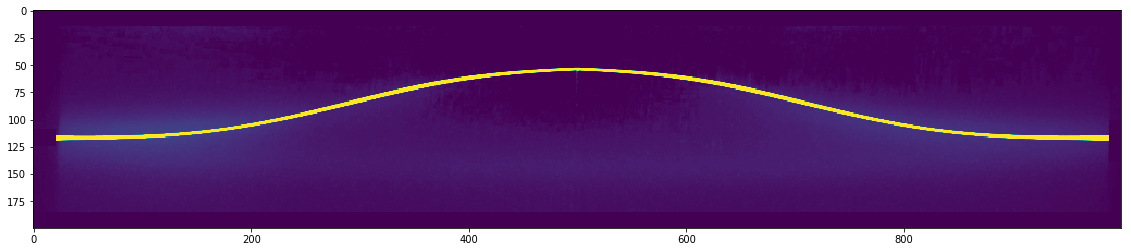

In [169]:
plt.figure(figsize=(25,4))
plt.imshow(spr)

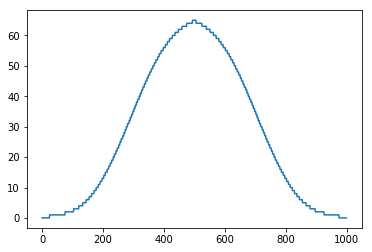

In [170]:
curve = np.argmax(np.flip(spr),axis=0)
curve-=80
curve[:20]=0
curve[1000-25:]=0
curve[499]=curve[500]
plt.plot(curve)

### Pump Correction

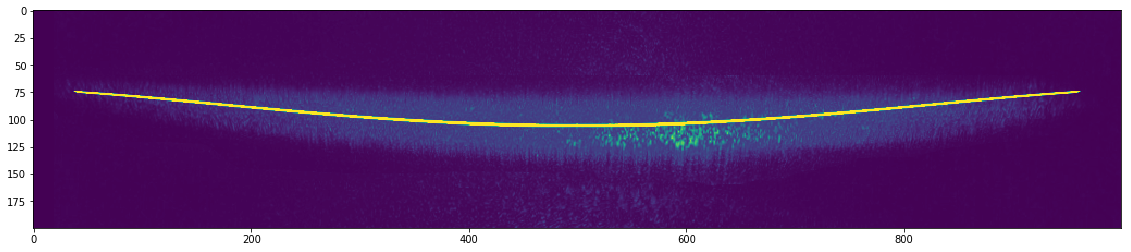

In [171]:
pump_raw = plt.imread('pump_grey3.png')
pump = np.flip(pump_raw[:,:,2].T)

plt.figure(figsize=(25,4))
plt.imshow(pump)

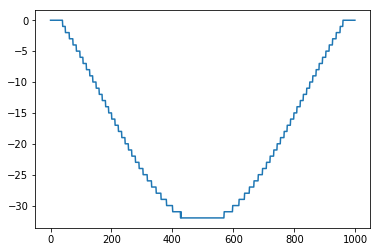

In [172]:
pump_curve = np.argmax(np.flip(pump),axis=0)
pump_curve-=125
pump_curve[:37]=0
pump_curve[1000-37:]=0
#curve[499]=curve[500]
plt.plot(pump_curve)

### Hормировка на pump

In [173]:
polar_norm = curve - pump_curve

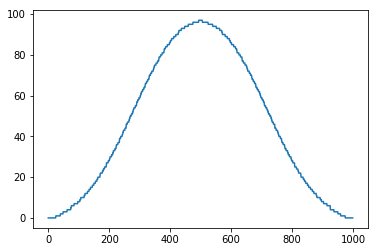

In [174]:
plt.plot(polar_norm)

---

Selmeyer's formula: $$n_{e,o} = A - \frac{B}{C-\lambda^{2}} - D\lambda^{2} $$

In [175]:
coef_iod_o = [3.4157,4.7031,3.531,0.88]
coef_iod_e = [2.9187,3.5114,2.822,0.36]

coef_niob_o = [4.9017,11.228,4.9656,3.9636]
coef_niob_e = [4.5583,9.1806,4.8086,3.2068]

coef_bbo_o = [ 2.7405, 1.84, 1.79, 15.5]
coef_bbo_e = [ 2.373, 1.28, 1.56, 4.4]

In [176]:
def n_o(lambd1):
    no = np.sqrt(coef_niob_o[0]-coef_niob_o[1]*10**(-4)/(coef_niob_o[2]*10**(-4)-lambd1**2)-coef_niob_o[3]*10**8*lambd1**2)
    return no

def n_e(lambd2):
    ne = np.sqrt(coef_niob_e[0]-coef_niob_e[1]*10**(-4)/(coef_niob_e[2]*10**(-4)-lambd2**2)-coef_niob_e[3]*10**8*lambd2**2)
    return ne

### Перевод в углы и длины волн

In [177]:
def wavelength(x):
    x_shift = x
    lam = -3.2*10**(-10)*x_shift**3+5.2*10**(-6)*x_shift**2+0.019*x_shift+491
    return lam

def angle(y):   
    tet = 0.023*y
    return tet

In [178]:
# angles
teta = angle(np.arange(-len(polar_norm)/2,len(polar_norm)/2))

In [179]:
# wavelength (taking into account shift from pump)
polariton = wavelength(610.-polar_norm)

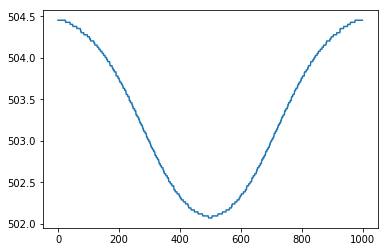

In [180]:
plt.plot(polariton)

### Учет преломления на границе (по Снеллиусу)

In [181]:
teta_snell = arcsin(sin(teta*pi/180.)*1./n_o(polariton*10**(-9)))*180/pi

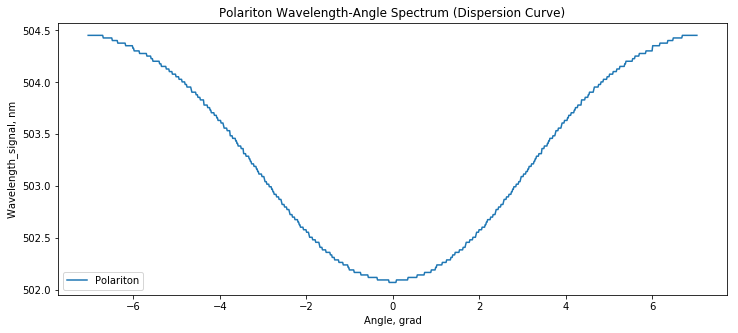

In [182]:
plt.figure(figsize=(12,5))
plt.plot(teta_snell, polariton, label='Polariton')
plt.xlabel('Angle, grad')
plt.ylabel('Wavelength_signal, nm')
plt.title('Polariton Wavelength-Angle Spectrum (Dispersion Curve)')
plt.legend()

## Tuning Curve

In [183]:
# from lambda_signal to omega_idle in cm^(-1)
tun_curve = (1/(491.)-1/(polariton))*10**7

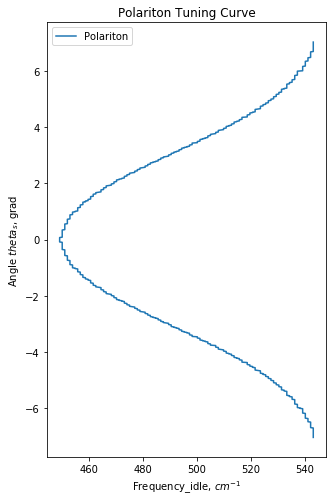

In [184]:
plt.figure(figsize=(5,8))
plt.plot(tun_curve, teta_snell, label='Polariton')
plt.xlabel('Frequency_idle, $cm^{-1}$')
plt.ylabel('Angle $theta_s$, grad')
plt.title('Polariton Tuning Curve')
plt.legend()

### Dispersion n (lambda) (Selmeyer)

In [185]:
n_e(491*10**(-9))

1.6275805193499782

In [186]:
n_idle_optic = n_o(10**(-2)/tun_curve)

Text(0.5, 1.0, 'n_iddle from Frequency_idle')

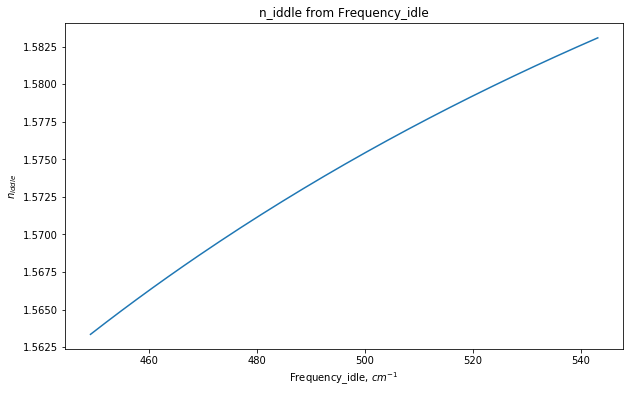

In [187]:
st=0
stp=500
plt.figure(figsize=(10,6))
plt.plot(tun_curve[st:stp], n_idle_optic[st:stp])
plt.xlabel('Frequency_idle, $cm^{-1}$')
plt.ylabel('$n_{iddle}$')
plt.title('n_iddle from Frequency_idle')

### Wavevector

Polariton Wavevector: $$k_{i}=\sqrt{k_{p}^{2}+k_{s}^{2}-2k_{p}k_{s}\cos{\theta_s}}$$

In [188]:
fi = 52
fi2 = 37
n_pump = n_e(491*10**(-9))*n_o(491*10**(-9))/sqrt((n_e(491*10**(-9))*cos(fi2*pi/180))**2
                                                     +(n_o(491*10**(-9))*sin(fi2*pi/180))**2)

k_p = 2*np.pi/(491.)*10**7*n_e(491*10**(-9)) #n_e(491*10**(-9)) #n_pump

k_s = 2*pi/(polariton)*10**7*n_o(polariton*10**(-9))

teta_s = teta_snell

k_i = sqrt(k_p**2+k_s**2-2*k_p*k_s*cos(teta_s*pi/180))

k_p

208276.78218801433

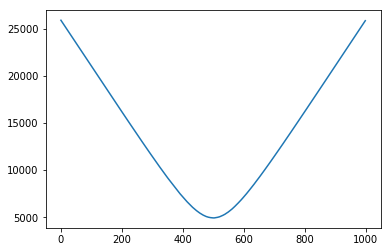

In [189]:
plt.plot(k_i)

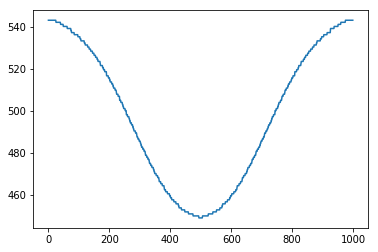

In [190]:
plt.plot(tun_curve)

Text(0.5, 1.0, 'Idle Dispersion Curve')

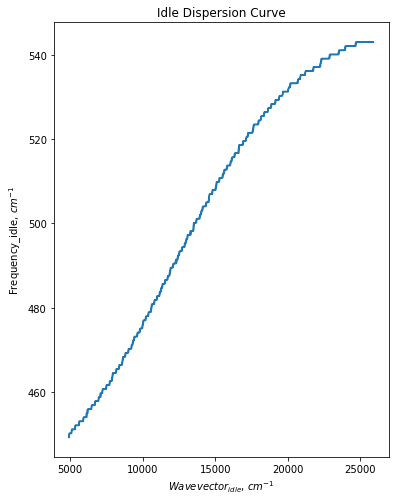

In [191]:
st=0
stp=1000
plt.figure(figsize=(6,8))
plt.plot(k_i[st:stp], tun_curve[st:stp])
plt.xlabel('$Wavevector_{idle}$, $cm^{-1}$')
plt.ylabel('Frequency_idle, $cm^{-1}$')
plt.title('Idle Dispersion Curve')
#plt.legend()

### Refractive Index n for Idle Wave

$$n_i = \frac{k_i}{2\pi\nu_i}$$

In [192]:
n_idle = k_i/(2*np.pi*tun_curve)

Text(0.5, 1.0, 'Refractive Index from Frequency_idle')

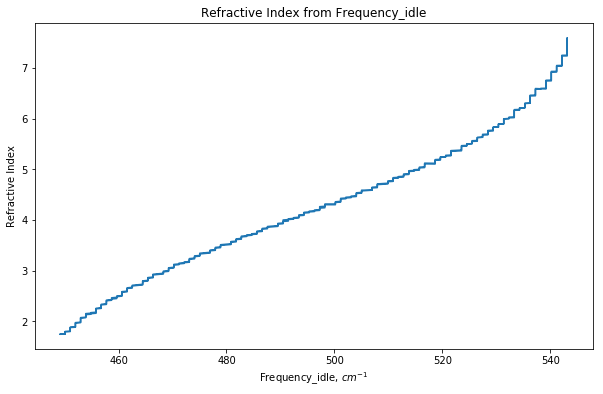

In [193]:
plt.figure(figsize=(10,6))
plt.plot(tun_curve, n_idle)
plt.xlabel('Frequency_idle, $cm^{-1}$')
plt.ylabel('Refractive Index')
plt.title('Refractive Index from Frequency_idle')

Text(0.5, 1.0, 'Refractive Index from Frequency_idle')

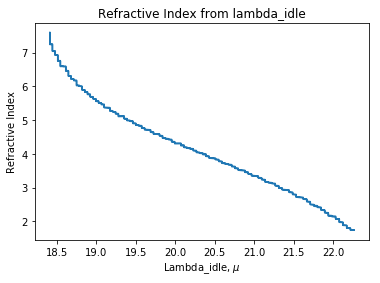

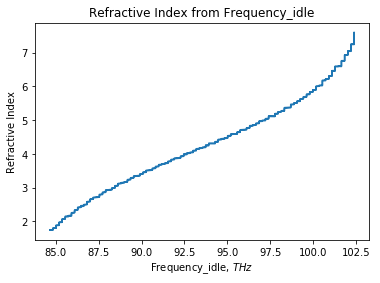

In [194]:
plt.figure(figsize=(6,4))
plt.plot(1/tun_curve*10**4, n_idle)
plt.xlabel('Lambda_idle, $\mu$')
plt.ylabel('Refractive Index')
plt.title('Refractive Index from lambda_idle')

plt.figure(figsize=(6,4))
plt.plot(2*pi*3*tun_curve*10**(-2), n_idle)
plt.xlabel('Frequency_idle, $THz$')
plt.ylabel('Refractive Index')
plt.title('Refractive Index from Frequency_idle')

### Dielectric Constant

$$\varepsilon'(\nu_i) = (\frac{k(\nu_i)}{2\pi\nu_i})^2$$

In [195]:
eps = (k_i/(2*np.pi*tun_curve))**2

Text(0.5, 1.0, 'Real $\\epsilon$ from Frequency_idle')

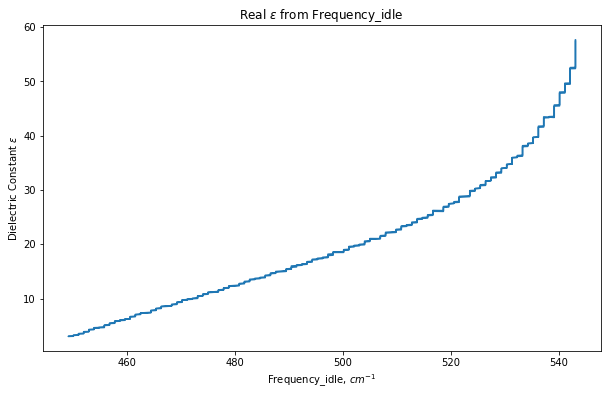

In [196]:
st=0
stp=1000
plt.figure(figsize=(10,6))
plt.plot(tun_curve[st:stp], eps[st:stp])
plt.xlabel('Frequency_idle, $cm^{-1}$')
plt.ylabel('Dielectric Constant $\epsilon$')
plt.title('Real $\epsilon$ from Frequency_idle')